In [560]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as smf

pd.set_option('display.max_columns', 500)


%matplotlib inline

In [561]:
#removed the stops that are outside of San Francisco, Need to add this step to the linking buffer data step
estimate = pd.read_csv('E:/Transit-Casa-Alex/Output/Modeling/2009/Tenth_Data.csv',thousands = ',')
estimate = estimate.drop(estimate[estimate['STOP_ID'].isin([4341,5585,5588,5594,7099,7554,7606,7842,4808,4809,4895,6283,6384,6385,6388,6389,7522,7127])].index,axis = 0)

In [562]:
estimate['FREQ_S'] = 1 / (estimate['HEADWAY_S'] / 60.0)

In [563]:
print(max(estimate.RUNSPEED))
print(min(estimate.RUNSPEED))

112.523333333
0.0


In [564]:
print(max(estimate.TOTSPEED))
print(min(estimate.TOTSPEED))

81.8233333333
0.0


In [565]:
estimate.RUNSPEED = estimate.RUNSPEED.clip(upper = 40)
estimate.RUNSPEED = estimate.TOTSPEED.clip(upper = 40)


In [566]:
#leave out travel time to work for now
#estimate['Workers_16_And_Over_Mean_Travel_Time_To_Work_(Minutes)'] = estimate['Workers_16_And_Over_Mean_Travel_Time_To_Work_(Minutes)'].astype(float)

In [567]:
estimate.info(max_cols = 99999)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3588 entries, 0 to 3603
Data columns (total 111 columns):
Unnamed: 0                                                3588 non-null int64
STOP_ID                                                   3588 non-null int64
DOW                                                       3588 non-null float64
NUMDAYS                                                   3588 non-null float64
OBSDAYS                                                   3588 non-null float64
TRIP_STOPS                                                3588 non-null float64
OBS_TRIP_STOPS                                            3588 non-null float64
WGT_TRIP_STOPS                                            3583 non-null float64
HEADWAY_S                                                 3572 non-null float64
FARE                                                      3588 non-null float64
STOP_LAT_x                                                3588 non-null float64
STOP_LON_x      

In [518]:
estimate.head()

,Unnamed: 0,STOP_ID,DOW,NUMDAYS,OBSDAYS,TRIP_STOPS,OBS_TRIP_STOPS,WGT_TRIP_STOPS,HEADWAY_S,FARE,STOP_LAT_x,STOP_LON_x,EOL,SOL,TIMEPOINT,ARRIVAL_TIME_DEV,DEPARTURE_TIME_DEV,DWELL_S,DWELL,RUNTIME_S,RUNTIME,TOTTIME_S,TOTTIME,SERVMILES_S,SERVMILES,RUNSPEED_S,RUNSPEED,TOTSPEED_S,TOTSPEED,ONTIME5,ON,OFF,LOAD_ARR,LOAD_DEP,PASSMILES,PASSHOURS,WAITHOURS,FULLFARE_REV,PASSDELAY_DEP,PASSDELAY_ARR,RDBRDNGS,DOORCYCLES,WHEELCHAIR,BIKERACK,CAPACITY,VC,CROWDED,CROWDHOURS,STOP_LAT_y,STOP_LON_y,geometry,index_right,ALAND00,AWATER00,COUNTYFP00,CTIDFP00,NAME00,TRACTCE00,Id,Id2,Geography,Total_Pop,Total_Housing_Units,Workers_16_And_Over_Mean_Travel_Time_To_Work_(Minutes),VAC_RATE,OCC_RATE,PER_INCOME_0-15,PER_INCOME_15-50,PER_INCOME_50-100,PER_INCOME_100+,AVG_HH_SIZE,PER_HH_0VEH,POP_DEN_ACS,HH_DEN_ACS,HU_DEN_ACS,geometry_a,Average Hourly Price,parking_rate,PRICE1HR,PRICE2HR,PRICE3HR,PRICE4HR,PRICE12HR,PRICEDAY,PRICEDAYDISCOUNT,BART_FROMS,BART_TOS,CALTRAIN_OFF,CALTRAIN_ON,MUNI_RAIL_ALIGHTINGS,MUNI_RAIL_BOARDINGS,EDHLTH_RAC_SCALED,EDHLTH_WAC_SCALED,EMP_RAC_SCALED,EMP_WAC_SCALED,LEISER_RAC_SCALED,LEISER_WAC_SCALED,OTHER_RAC_SCALED,OTHER_WAC_SCALED,RETAIL_RAC_SCALED,RETAIL_WAC_SCALED,HOUSING_09_SCALED,NUM_BUS_STOPS,Count_,FID_1,STOP_LAT,STOP_LON,geometry_e,EDD_EMP,geometry_f,FREQ_S
0,0,3001,1.0,21.0,21.000000,63.000000,9.500000,63.000000,12.870968,2.0,37.788530,-122.396044,0.0,0.0,1.0,1.072379,1.081051,0.0,0.547391,43.610000,48.905914,43.610000,49.453304,4.284000,4.284000,5.890000,5.225000,5.890000,5.225000,0.650636,14.997088,4.519693,1162.028642,1172.506037,79.017948,18.063030,1.322061,29.994176,26.938116,25.339884,0.0,3.523233,0.000000,0.206557,645.034091,0.292776,0.017570,1.017228,37.788530,-122.396044,POINT (-122.396044 37.78853),5.0,562992.0,63060.0,75.0,6.075018e+09,176.02,17602.0,1400000US06075017602,6.075018e+09,"Census Tract 176.02, San Francisco County, Cal...",1054.0,1107.0,20.9,0.373080,0.626920,0.008646,0.324207,0.129683,0.537464,1.518732,0.354467,7.576295,4.988566,7.957266,POINT (6013806.632569867 2115133.54434165),317.0,0.717403,1700.0,1700.0,1700.0,1700.0,1700.0,1700.0,1361.5,NaN,NaN,NaN,NaN,NaN,NaN,5.495661,58.078897,41.584791,3994.976236,3.736130,170.357958,27.184539,3706.208163,5.168461,60.331218,12.908306,5.0,0.0,4.0,37.788530,-122.396044,POLYGON ((-122.3942171872453 37.78855936227788...,6419.0,POLYGON ((-122.3942171872453 37.78855936227788...,4.661654
1,1,3003,1.0,20.0,19.333333,61.333333,10.666667,61.264825,15.159260,2.0,37.781827,-122.391945,0.0,0.0,0.0,1.078691,1.222782,0.0,8.853592,40.966667,30.279509,40.966667,39.133100,6.133333,6.125866,8.970000,9.453333,8.970000,9.453333,0.765185,58.481198,18.637329,1029.535938,1069.379807,102.946060,11.191763,6.057064,116.962396,157.240873,142.701903,0.0,54.225016,0.027273,0.000000,707.079545,0.266768,0.032016,1.242915,37.781827,-122.391945,POINT (-122.391945 37.781827),10.0,1104393.0,376679.0,75.0,6.075018e+09,179.01,17901.0,1400000US06075017901,6.075018e+09,"Census Tract 179.01, San Francisco County, Cal...",8416.0,5228.0,28.0,0.220735,0.779265,0.055228,0.179921,0.191949,0.572901,2.065783,0.242023,30.839019,14.928489,19.157128,POINT (6014941.534248216 2112669.363861877),306.0,1.052738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.458089,7.142484,178.682736,2234.048853,14.819414,170.376866,122.031086,2013.646230,12.374148,42.883273,373.257441,2.0,0.0,5.0,37.781827,-122.391945,POLYGON ((-122.3901183504868 37.78185629881523...,1790.0,POLYGON ((-122.3901183504868 37.78185629881523...,3.957977
2,2,3004,1.0,20.0,19.333333,55.666667,9.333333,55.626478,15.288476,2.0,37.781854,-122.392232,0.0,0.0,0.0,0.784972,0.876414,0.0,5.179305,50.666667,29.535586,50.666667,34.714891,6.997667,6.988946,8.436667,12.550000,8.436667,12.550000,0.619521,8.878226,53.150037,1030.624931,986.353120,127.021696,11.151654,0.923621,17.756451,23.462475,21.929398,0.0,46.365203,0.435076,0.000000,650.427273,0.291287,0.021341,0.742227,37.781854,-122.392232,POINT (-122.392232 37.781854),10.0,1104393.0,376679.0,75.0,6.07501

In [519]:
estimate[['HEADWAY_S', 'FREQ_S']].head()

,HEADWAY_S,FREQ_S
0,12.870968,4.661654
1,15.159260,3.957977
2,15.288476,3.924525
3,12.794118,4.689655
4,12.887097,4.655820


In [520]:
for column in estimate.columns:
        print(column)

Unnamed: 0
STOP_ID
DOW
NUMDAYS
OBSDAYS
TRIP_STOPS
OBS_TRIP_STOPS
WGT_TRIP_STOPS
HEADWAY_S
FARE
STOP_LAT_x
STOP_LON_x
EOL
SOL
TIMEPOINT
ARRIVAL_TIME_DEV
DEPARTURE_TIME_DEV
DWELL_S
DWELL
RUNTIME_S
RUNTIME
TOTTIME_S
TOTTIME
SERVMILES_S
SERVMILES
RUNSPEED_S
RUNSPEED
TOTSPEED_S
TOTSPEED
ONTIME5
ON
OFF
LOAD_ARR
LOAD_DEP
PASSMILES
PASSHOURS
WAITHOURS
FULLFARE_REV
PASSDELAY_DEP
PASSDELAY_ARR
RDBRDNGS
DOORCYCLES
WHEELCHAIR
BIKERACK
CAPACITY
VC
CROWDED
CROWDHOURS
STOP_LAT_y
STOP_LON_y
geometry
index_right
ALAND00
AWATER00
COUNTYFP00
CTIDFP00
NAME00
TRACTCE00
Id
Id2
Geography
Total_Pop
Total_Housing_Units
Workers_16_And_Over_Mean_Travel_Time_To_Work_(Minutes)
VAC_RATE
OCC_RATE
PER_INCOME_0-15
PER_INCOME_15-50
PER_INCOME_50-100
PER_INCOME_100+
AVG_HH_SIZE
PER_HH_0VEH
POP_DEN_ACS
HH_DEN_ACS
HU_DEN_ACS
geometry_a
Average Hourly Price
parking_rate
PRICE1HR
PRICE2HR
PRICE3HR
PRICE4HR
PRICE12HR
PRICEDAY
PRICEDAYDISCOUNT
BART_FROMS
BART_TOS
CALTRAIN_OFF
CALTRAIN_ON
MUNI_RAIL_ALIGHTINGS
MUNI_RAIL_BOARDIN

In [581]:
drop = ['Unnamed: 0',
'STOP_LAT_x',
'STOP_LON_x',
'STOP_LAT_y',
'STOP_LON_y',
'geometry',
'index_right',
'ALAND00',
'AWATER00',
'COUNTYFP00',
'CTIDFP00',
'NAME00',
'TRACTCE00',
'Id',
'Id2',
'Geography',
'geometry_a',
'geometry_e',
'geometry_f',
'STOP_LAT',
'STOP_LON',
'FID_1']

In [582]:
estimate = estimate.drop(drop,axis = 1)

ValueError: labels ['Unnamed: 0' 'STOP_LAT_x' 'STOP_LON_x' 'STOP_LAT_y' 'STOP_LON_y'
 'geometry' 'index_right' 'ALAND00' 'AWATER00' 'COUNTYFP00' 'CTIDFP00'
 'NAME00' 'TRACTCE00' 'Id' 'Id2' 'Geography' 'geometry_a' 'geometry_e'
 'geometry_f' 'STOP_LAT' 'STOP_LON' 'FID_1'] not contained in axis

In [391]:
for column in estimate.columns:
    print(column)

ARRIVAL_TIME_DEV
AVG_HH_SIZE
Average Hourly Price
BART_FROMS
BART_TOS
BIKERACK
CALTRAIN_OFF
CALTRAIN_ON
CAPACITY
CROWDED
CROWDHOURS
Count_
DEPARTURE_TIME_DEV
DOORCYCLES
DOW
DWELL
DWELL_S
EDD_EMP
EDHLTH_RAC_SCALED
EDHLTH_WAC_SCALED
EMP_RAC_SCALED
EMP_WAC_SCALED
EOL
FARE
FREQ_S
FULLFARE_REV
HEADWAY_S
HH_DEN_ACS
HOUSING_09_SCALED
HU_DEN_ACS
LEISER_RAC_SCALED
LEISER_WAC_SCALED
LOAD_ARR
LOAD_DEP
MUNI_RAIL_ALIGHTINGS
MUNI_RAIL_BOARDINGS
NUMDAYS
NUM_BUS_STOPS
OBSDAYS
OBS_TRIP_STOPS
OCC_RATE
OFF
ON
ONTIME5
OTHER_RAC_SCALED
OTHER_WAC_SCALED
PASSDELAY_ARR
PASSDELAY_DEP
PASSHOURS
PASSMILES
PER_HH_0VEH
PER_INCOME_0-15
PER_INCOME_100+
PER_INCOME_15-50
PER_INCOME_50-100
POP_DEN_ACS
PRICE12HR
PRICE1HR
PRICE2HR
PRICE3HR
PRICE4HR
PRICEDAY
PRICEDAYDISCOUNT
RDBRDNGS
RETAIL_RAC_SCALED
RETAIL_WAC_SCALED
RUNSPEED
RUNSPEED_S
RUNTIME
RUNTIME_S
SERVMILES
SERVMILES_S
SOL
STOP_ID
TIMEPOINT
TOTSPEED
TOTSPEED_S
TOTTIME
TOTTIME_S
TRIP_STOPS
Total_Housing_Units
Total_Pop
VAC_RATE
VC
WAITHOURS
WGT_TRIP_STOPS
WHEELCHA

In [583]:
len(estimate.columns)

89

In [584]:
change = ['EMP_RAC_SCALED','EMP_WAC_SCALED','LEISER_RAC_SCALED','LEISER_WAC_SCALED','OTHER_RAC_SCALED','OTHER_WAC_SCALED','RETAIL_RAC_SCALED','RETAIL_WAC_SCALED','BART_FROMS','BART_TOS','MUNI_RAIL_ALIGHTINGS','MUNI_RAIL_BOARDINGS','CALTRAIN_OFF','CALTRAIN_ON','NUM_BUS_STOPS']

In [585]:
for column in change:
    estimate[column] = estimate[column].fillna(0)

In [573]:
estimate = estimate.drop(estimate[np.isnan(estimate['ON'])].index,axis = 0)

In [574]:
estimate[np.isnan(estimate['ON'])]

,STOP_ID,DOW,NUMDAYS,OBSDAYS,TRIP_STOPS,OBS_TRIP_STOPS,WGT_TRIP_STOPS,HEADWAY_S,FARE,EOL,SOL,TIMEPOINT,ARRIVAL_TIME_DEV,DEPARTURE_TIME_DEV,DWELL_S,DWELL,RUNTIME_S,RUNTIME,TOTTIME_S,TOTTIME,SERVMILES_S,SERVMILES,RUNSPEED_S,RUNSPEED,TOTSPEED_S,TOTSPEED,ONTIME5,ON,OFF,LOAD_ARR,LOAD_DEP,PASSMILES,PASSHOURS,WAITHOURS,FULLFARE_REV,PASSDELAY_DEP,PASSDELAY_ARR,RDBRDNGS,DOORCYCLES,WHEELCHAIR,BIKERACK,CAPACITY,VC,CROWDED,CROWDHOURS,Total_Pop,Total_Housing_Units,Workers_16_And_Over_Mean_Travel_Time_To_Work_(Minutes),VAC_RATE,OCC_RATE,PER_INCOME_0-15,PER_INCOME_15-50,PER_INCOME_50-100,PER_INCOME_100+,AVG_HH_SIZE,PER_HH_0VEH,POP_DEN_ACS,HH_DEN_ACS,HU_DEN_ACS,Average Hourly Price,parking_rate,PRICE1HR,PRICE2HR,PRICE3HR,PRICE4HR,PRICE12HR,PRICEDAY,PRICEDAYDISCOUNT,BART_FROMS,BART_TOS,CALTRAIN_OFF,CALTRAIN_ON,MUNI_RAIL_ALIGHTINGS,MUNI_RAIL_BOARDINGS,EDHLTH_RAC_SCALED,EDHLTH_WAC_SCALED,EMP_RAC_SCALED,EMP_WAC_SCALED,LEISER_RAC_SCALED,LEISER_WAC_SCALED,OTHER_RAC_SCALED,OTHER_WAC_SCALED,RETAIL_RAC_SCALED,RETAIL_WAC_SCALED,HOUSING_09_SCALED,NUM_BUS_STOPS,Count_,EDD_EMP,FREQ_S


In [575]:
estimate[np.isnan(estimate['BART_FROMS'])]

,STOP_ID,DOW,NUMDAYS,OBSDAYS,TRIP_STOPS,OBS_TRIP_STOPS,WGT_TRIP_STOPS,HEADWAY_S,FARE,EOL,SOL,TIMEPOINT,ARRIVAL_TIME_DEV,DEPARTURE_TIME_DEV,DWELL_S,DWELL,RUNTIME_S,RUNTIME,TOTTIME_S,TOTTIME,SERVMILES_S,SERVMILES,RUNSPEED_S,RUNSPEED,TOTSPEED_S,TOTSPEED,ONTIME5,ON,OFF,LOAD_ARR,LOAD_DEP,PASSMILES,PASSHOURS,WAITHOURS,FULLFARE_REV,PASSDELAY_DEP,PASSDELAY_ARR,RDBRDNGS,DOORCYCLES,WHEELCHAIR,BIKERACK,CAPACITY,VC,CROWDED,CROWDHOURS,Total_Pop,Total_Housing_Units,Workers_16_And_Over_Mean_Travel_Time_To_Work_(Minutes),VAC_RATE,OCC_RATE,PER_INCOME_0-15,PER_INCOME_15-50,PER_INCOME_50-100,PER_INCOME_100+,AVG_HH_SIZE,PER_HH_0VEH,POP_DEN_ACS,HH_DEN_ACS,HU_DEN_ACS,Average Hourly Price,parking_rate,PRICE1HR,PRICE2HR,PRICE3HR,PRICE4HR,PRICE12HR,PRICEDAY,PRICEDAYDISCOUNT,BART_FROMS,BART_TOS,CALTRAIN_OFF,CALTRAIN_ON,MUNI_RAIL_ALIGHTINGS,MUNI_RAIL_BOARDINGS,EDHLTH_RAC_SCALED,EDHLTH_WAC_SCALED,EMP_RAC_SCALED,EMP_WAC_SCALED,LEISER_RAC_SCALED,LEISER_WAC_SCALED,OTHER_RAC_SCALED,OTHER_WAC_SCALED,RETAIL_RAC_SCALED,RETAIL_WAC_SCALED,HOUSING_09_SCALED,NUM_BUS_STOPS,Count_,EDD_EMP,FREQ_S


In [576]:
estimate = estimate.sort(axis = 1)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


In [577]:
for column in estimate.columns:
    print(column)

ARRIVAL_TIME_DEV
AVG_HH_SIZE
Average Hourly Price
BART_FROMS
BART_TOS
BIKERACK
CALTRAIN_OFF
CALTRAIN_ON
CAPACITY
CROWDED
CROWDHOURS
Count_
DEPARTURE_TIME_DEV
DOORCYCLES
DOW
DWELL
DWELL_S
EDD_EMP
EDHLTH_RAC_SCALED
EDHLTH_WAC_SCALED
EMP_RAC_SCALED
EMP_WAC_SCALED
EOL
FARE
FREQ_S
FULLFARE_REV
HEADWAY_S
HH_DEN_ACS
HOUSING_09_SCALED
HU_DEN_ACS
LEISER_RAC_SCALED
LEISER_WAC_SCALED
LOAD_ARR
LOAD_DEP
MUNI_RAIL_ALIGHTINGS
MUNI_RAIL_BOARDINGS
NUMDAYS
NUM_BUS_STOPS
OBSDAYS
OBS_TRIP_STOPS
OCC_RATE
OFF
ON
ONTIME5
OTHER_RAC_SCALED
OTHER_WAC_SCALED
PASSDELAY_ARR
PASSDELAY_DEP
PASSHOURS
PASSMILES
PER_HH_0VEH
PER_INCOME_0-15
PER_INCOME_100+
PER_INCOME_15-50
PER_INCOME_50-100
POP_DEN_ACS
PRICE12HR
PRICE1HR
PRICE2HR
PRICE3HR
PRICE4HR
PRICEDAY
PRICEDAYDISCOUNT
RDBRDNGS
RETAIL_RAC_SCALED
RETAIL_WAC_SCALED
RUNSPEED
RUNSPEED_S
RUNTIME
RUNTIME_S
SERVMILES
SERVMILES_S
SOL
STOP_ID
TIMEPOINT
TOTSPEED
TOTSPEED_S
TOTTIME
TOTTIME_S
TRIP_STOPS
Total_Housing_Units
Total_Pop
VAC_RATE
VC
WAITHOURS
WGT_TRIP_STOPS
WHEELCHA

In [586]:
rename = ['ARRIVAL_TIME_DEV',
'AVG_HH_SIZE',
'HOURLY_AVG_ON_PARK',
'BART_FROMS',
'BART_TOS',
'BIKERACK',
'CALTRAIN_OFF',
'CALTRAIN_ON',
'CAPACITY',
'CROWDED',
'CROWDHOURS',
'TRANSBAY',
'DEPARTURE_TIME_DEV',
'DOORCYCLES',
'DOW',
'DWELL',
'DWELL_S',
'EDD_EMP',
'EDHLTH_RAC_SCALED',
'EDHLTH_WAC_SCALED',
'EMP_RAC_SCALED',
'EMP_WAC_SCALED',
'EOL',
'FARE',
'FREQ_S',
'FULLFARE_REV',
'HEADWAY_S',
'HH_DEN_ACS',
'HOUSING_09_SCALED',
'HU_DEN_ACS',
'LEISER_RAC_SCALED',
'LEISER_WAC_SCALED',
'LOAD_ARR',
'LOAD_DEP',
'MUNI_RAIL_ALIGHTINGS',
'MUNI_RAIL_BOARDINGS',
'NUMDAYS',
'NUM_BUS_STOPS',
'OBSDAYS',
'OBS_TRIP_STOPS',
'OCC_RATE',
'OFF',
'ON',
'ONTIME5',
'OTHER_RAC_SCALED',
'OTHER_WAC_SCALED',
'PASSDELAY_ARR',
'PASSDELAY_DEP',
'PASSHOURS',
'PASSMILES',
'SHR_HH_0VEH',
'SHR_INCOME_0_15',
'SHR_INCOME_100P',
'SHR_INCOME_15_50',
'SHR_INCOME_50_100',
'POP_DEN_ACS',
'12_HR_OFF_PUB_PARK',
'1_HR_OFF_PUB_PARK',
'2_HR_OFF_PUB_PARK',
'3_HR_OFF_PUB_PARK',
'4_HR_OFF_PUB_PARK',
'DAY_OFF_PUB_PARK',
'DAY_DISCOUNT_OFF_PUB_PARK',
'RDBRDNGS',
'RETAIL_RAC_SCALED',
'RETAIL_WAC_SCALED',
'RUNSPEED',
'RUNSPEED_S',
'RUNTIME',
'RUNTIME_S',
'SERVMILES',
'SERVMILES_S',
'SOL',
'STOP_ID',
'TIMEPOINT',
'TOTSPEED',
'TOTSPEED_S',
'TOTTIME',
'TOTTIME_S',
'TRIP_STOPS',
'Total_Housing_Units',
'Total_Pop',
'VAC_RATE',
'VC',
'WAITHOURS',
'WGT_TRIP_STOPS',
'WHEELCHAIR',
'AVG_TT_TO_WORK_MINUTES',
'PARKING_RATE_OFF_RESIDENTIAL']

In [587]:
estimate.columns = rename

In [588]:
# basic set of initial variables
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED\
                       + ONTIME5 \
                       + HEADWAY_S \
                       + EOL\
                       + SOL \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     272.9
Date:                Fri, 14 Jul 2017   Prob (F-statistic):          8.12e-288
Time:                        10:09:40   Log-Likelihood:                -24834.
No. Observations:                3547   AIC:                         4.968e+04
Df Residuals:                    3541   BIC:                         4.972e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
EMP_WAC_SCALED        0.0299      0.00

In [630]:
# basic set of initial variables
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED\
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     242.9
Date:                Fri, 14 Jul 2017   Prob (F-statistic):          1.30e-260
Time:                        10:10:47   Log-Likelihood:                -24897.
No. Observations:                3547   AIC:                         4.981e+04
Df Residuals:                    3541   BIC:                         4.984e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
EMP_WAC_SCALED        0.0299      0.00

In [590]:
# basic set of initial variables
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED\
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     247.5
Date:                Fri, 14 Jul 2017   Prob (F-statistic):          1.29e-300
Time:                        10:09:43   Log-Likelihood:                -24802.
No. Observations:                3547   AIC:                         4.962e+04
Df Residuals:                    3540   BIC:                         4.966e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
EMP_WAC_SCALED        0.0236      0.00

In [591]:
# add competing stops
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED\
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     217.0
Date:                Fri, 14 Jul 2017   Prob (F-statistic):          6.10e-300
Time:                        10:09:43   Log-Likelihood:                -24801.
No. Observations:                3547   AIC:                         4.962e+04
Df Residuals:                    3539   BIC:                         4.967e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
EMP_WAC_SCALED        0.0228      0.00

In [592]:
# add transbay terminal 
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED\
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY\
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     194.8
Date:                Fri, 14 Jul 2017   Prob (F-statistic):          2.93e-301
Time:                        10:09:43   Log-Likelihood:                -24795.
No. Observations:                3547   AIC:                         4.961e+04
Df Residuals:                    3538   BIC:                         4.966e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
EMP_WAC_SCALED        0.0216      0.00

In [593]:
#add in BARTS Boardings 
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED\
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + BART_FROMS \
                       + TRANSBAY \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     204.9
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:09:43   Log-Likelihood:                -24698.
No. Observations:                3547   AIC:                         4.942e+04
Df Residuals:                    3537   BIC:                         4.948e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
EMP_WAC_SCALED        0.0138      0.00

In [594]:
# swap out hh density
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HH_DEN_ACS \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + BART_FROMS \
                       + TRANSBAY \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     205.1
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:09:43   Log-Likelihood:                -24697.
No. Observations:                3547   AIC:                         4.941e+04
Df Residuals:                    3537   BIC:                         4.948e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
EMP_WAC_SCALED     0.0138      0.002      5.

In [595]:
# Drop bart boardings
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HH_DEN_ACS \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 14 Jul 2017   Prob (F-statistic):          3.69e-300
Time:                        10:09:44   Log-Likelihood:                -24800.
No. Observations:                3547   AIC:                         4.962e+04
Df Residuals:                    3539   BIC:                         4.967e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
EMP_WAC_SCALED     0.0228      0.002     10.

In [596]:
# drop competing stops
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HH_DEN_ACS \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     245.0
Date:                Fri, 14 Jul 2017   Prob (F-statistic):          1.33e-262
Time:                        10:09:46   Log-Likelihood:                -24893.
No. Observations:                3547   AIC:                         4.980e+04
Df Residuals:                    3541   BIC:                         4.983e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
EMP_WAC_SCALED     0.0295      0.002     13.

In [597]:
# RUN 20 
# back to preferred model
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HH_DEN_ACS \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     194.9
Date:                Fri, 14 Jul 2017   Prob (F-statistic):          1.68e-301
Time:                        10:09:46   Log-Likelihood:                -24794.
No. Observations:                3547   AIC:                         4.961e+04
Df Residuals:                    3538   BIC:                         4.966e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
EMP_WAC_SCALED     0.0216      0.002      9.

In [598]:
estimate[np.isnan(estimate['AVG_HH_SIZE'])]

,ARRIVAL_TIME_DEV,AVG_HH_SIZE,HOURLY_AVG_ON_PARK,BART_FROMS,BART_TOS,BIKERACK,CALTRAIN_OFF,CALTRAIN_ON,CAPACITY,CROWDED,CROWDHOURS,TRANSBAY,DEPARTURE_TIME_DEV,DOORCYCLES,DOW,DWELL,DWELL_S,EDD_EMP,EDHLTH_RAC_SCALED,EDHLTH_WAC_SCALED,EMP_RAC_SCALED,EMP_WAC_SCALED,EOL,FARE,FREQ_S,FULLFARE_REV,HEADWAY_S,HH_DEN_ACS,HOUSING_09_SCALED,HU_DEN_ACS,LEISER_RAC_SCALED,LEISER_WAC_SCALED,LOAD_ARR,LOAD_DEP,MUNI_RAIL_ALIGHTINGS,MUNI_RAIL_BOARDINGS,NUMDAYS,NUM_BUS_STOPS,OBSDAYS,OBS_TRIP_STOPS,OCC_RATE,OFF,ON,ONTIME5,OTHER_RAC_SCALED,OTHER_WAC_SCALED,PASSDELAY_ARR,PASSDELAY_DEP,PASSHOURS,PASSMILES,SHR_HH_0VEH,SHR_INCOME_0_15,SHR_INCOME_100P,SHR_INCOME_15_50,SHR_INCOME_50_100,POP_DEN_ACS,12_HR_OFF_PUB_PARK,1_HR_OFF_PUB_PARK,2_HR_OFF_PUB_PARK,3_HR_OFF_PUB_PARK,4_HR_OFF_PUB_PARK,DAY_OFF_PUB_PARK,DAY_DISCOUNT_OFF_PUB_PARK,RDBRDNGS,RETAIL_RAC_SCALED,RETAIL_WAC_SCALED,RUNSPEED,RUNSPEED_S,RUNTIME,RUNTIME_S,SERVMILES,SERVMILES_S,SOL,STOP_ID,TIMEPOINT,TOTSPEED,TOTSPEED_S,TOTTIME,TOTTIME_S,TRIP_STOPS,Total_Housing_Units,Total_Pop,VAC_RATE,VC,WAITHOURS,WGT_TRIP_STOPS,WHEELCHAIR,AVG_TT_TO_WORK_MINUTES,PARKING_RATE_OFF_RESIDENTIAL


In [599]:
for column in estimate.columns:
    print(column)

ARRIVAL_TIME_DEV
AVG_HH_SIZE
HOURLY_AVG_ON_PARK
BART_FROMS
BART_TOS
BIKERACK
CALTRAIN_OFF
CALTRAIN_ON
CAPACITY
CROWDED
CROWDHOURS
TRANSBAY
DEPARTURE_TIME_DEV
DOORCYCLES
DOW
DWELL
DWELL_S
EDD_EMP
EDHLTH_RAC_SCALED
EDHLTH_WAC_SCALED
EMP_RAC_SCALED
EMP_WAC_SCALED
EOL
FARE
FREQ_S
FULLFARE_REV
HEADWAY_S
HH_DEN_ACS
HOUSING_09_SCALED
HU_DEN_ACS
LEISER_RAC_SCALED
LEISER_WAC_SCALED
LOAD_ARR
LOAD_DEP
MUNI_RAIL_ALIGHTINGS
MUNI_RAIL_BOARDINGS
NUMDAYS
NUM_BUS_STOPS
OBSDAYS
OBS_TRIP_STOPS
OCC_RATE
OFF
ON
ONTIME5
OTHER_RAC_SCALED
OTHER_WAC_SCALED
PASSDELAY_ARR
PASSDELAY_DEP
PASSHOURS
PASSMILES
SHR_HH_0VEH
SHR_INCOME_0_15
SHR_INCOME_100P
SHR_INCOME_15_50
SHR_INCOME_50_100
POP_DEN_ACS
12_HR_OFF_PUB_PARK
1_HR_OFF_PUB_PARK
2_HR_OFF_PUB_PARK
3_HR_OFF_PUB_PARK
4_HR_OFF_PUB_PARK
DAY_OFF_PUB_PARK
DAY_DISCOUNT_OFF_PUB_PARK
RDBRDNGS
RETAIL_RAC_SCALED
RETAIL_WAC_SCALED
RUNSPEED
RUNSPEED_S
RUNTIME
RUNTIME_S
SERVMILES
SERVMILES_S
SOL
STOP_ID
TIMEPOINT
TOTSPEED
TOTSPEED_S
TOTTIME
TOTTIME_S
TRIP_STOPS
Total_Housing

In [600]:
estimate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3563 entries, 0 to 3603
Data columns (total 89 columns):
ARRIVAL_TIME_DEV                3563 non-null float64
AVG_HH_SIZE                     3563 non-null float64
HOURLY_AVG_ON_PARK              3562 non-null float64
BART_FROMS                      3563 non-null float64
BART_TOS                        3563 non-null float64
BIKERACK                        3563 non-null float64
CALTRAIN_OFF                    3563 non-null float64
CALTRAIN_ON                     3563 non-null float64
CAPACITY                        3563 non-null float64
CROWDED                         3563 non-null float64
CROWDHOURS                      3563 non-null float64
TRANSBAY                        3563 non-null float64
DEPARTURE_TIME_DEV              3563 non-null float64
DOORCYCLES                      3563 non-null float64
DOW                             3563 non-null float64
DWELL                           3563 non-null float64
DWELL_S                      

In [601]:
check = estimate[np.isnan(estimate['EDD_EMP'])]

In [602]:
check.to_csv('check.csv')

3484


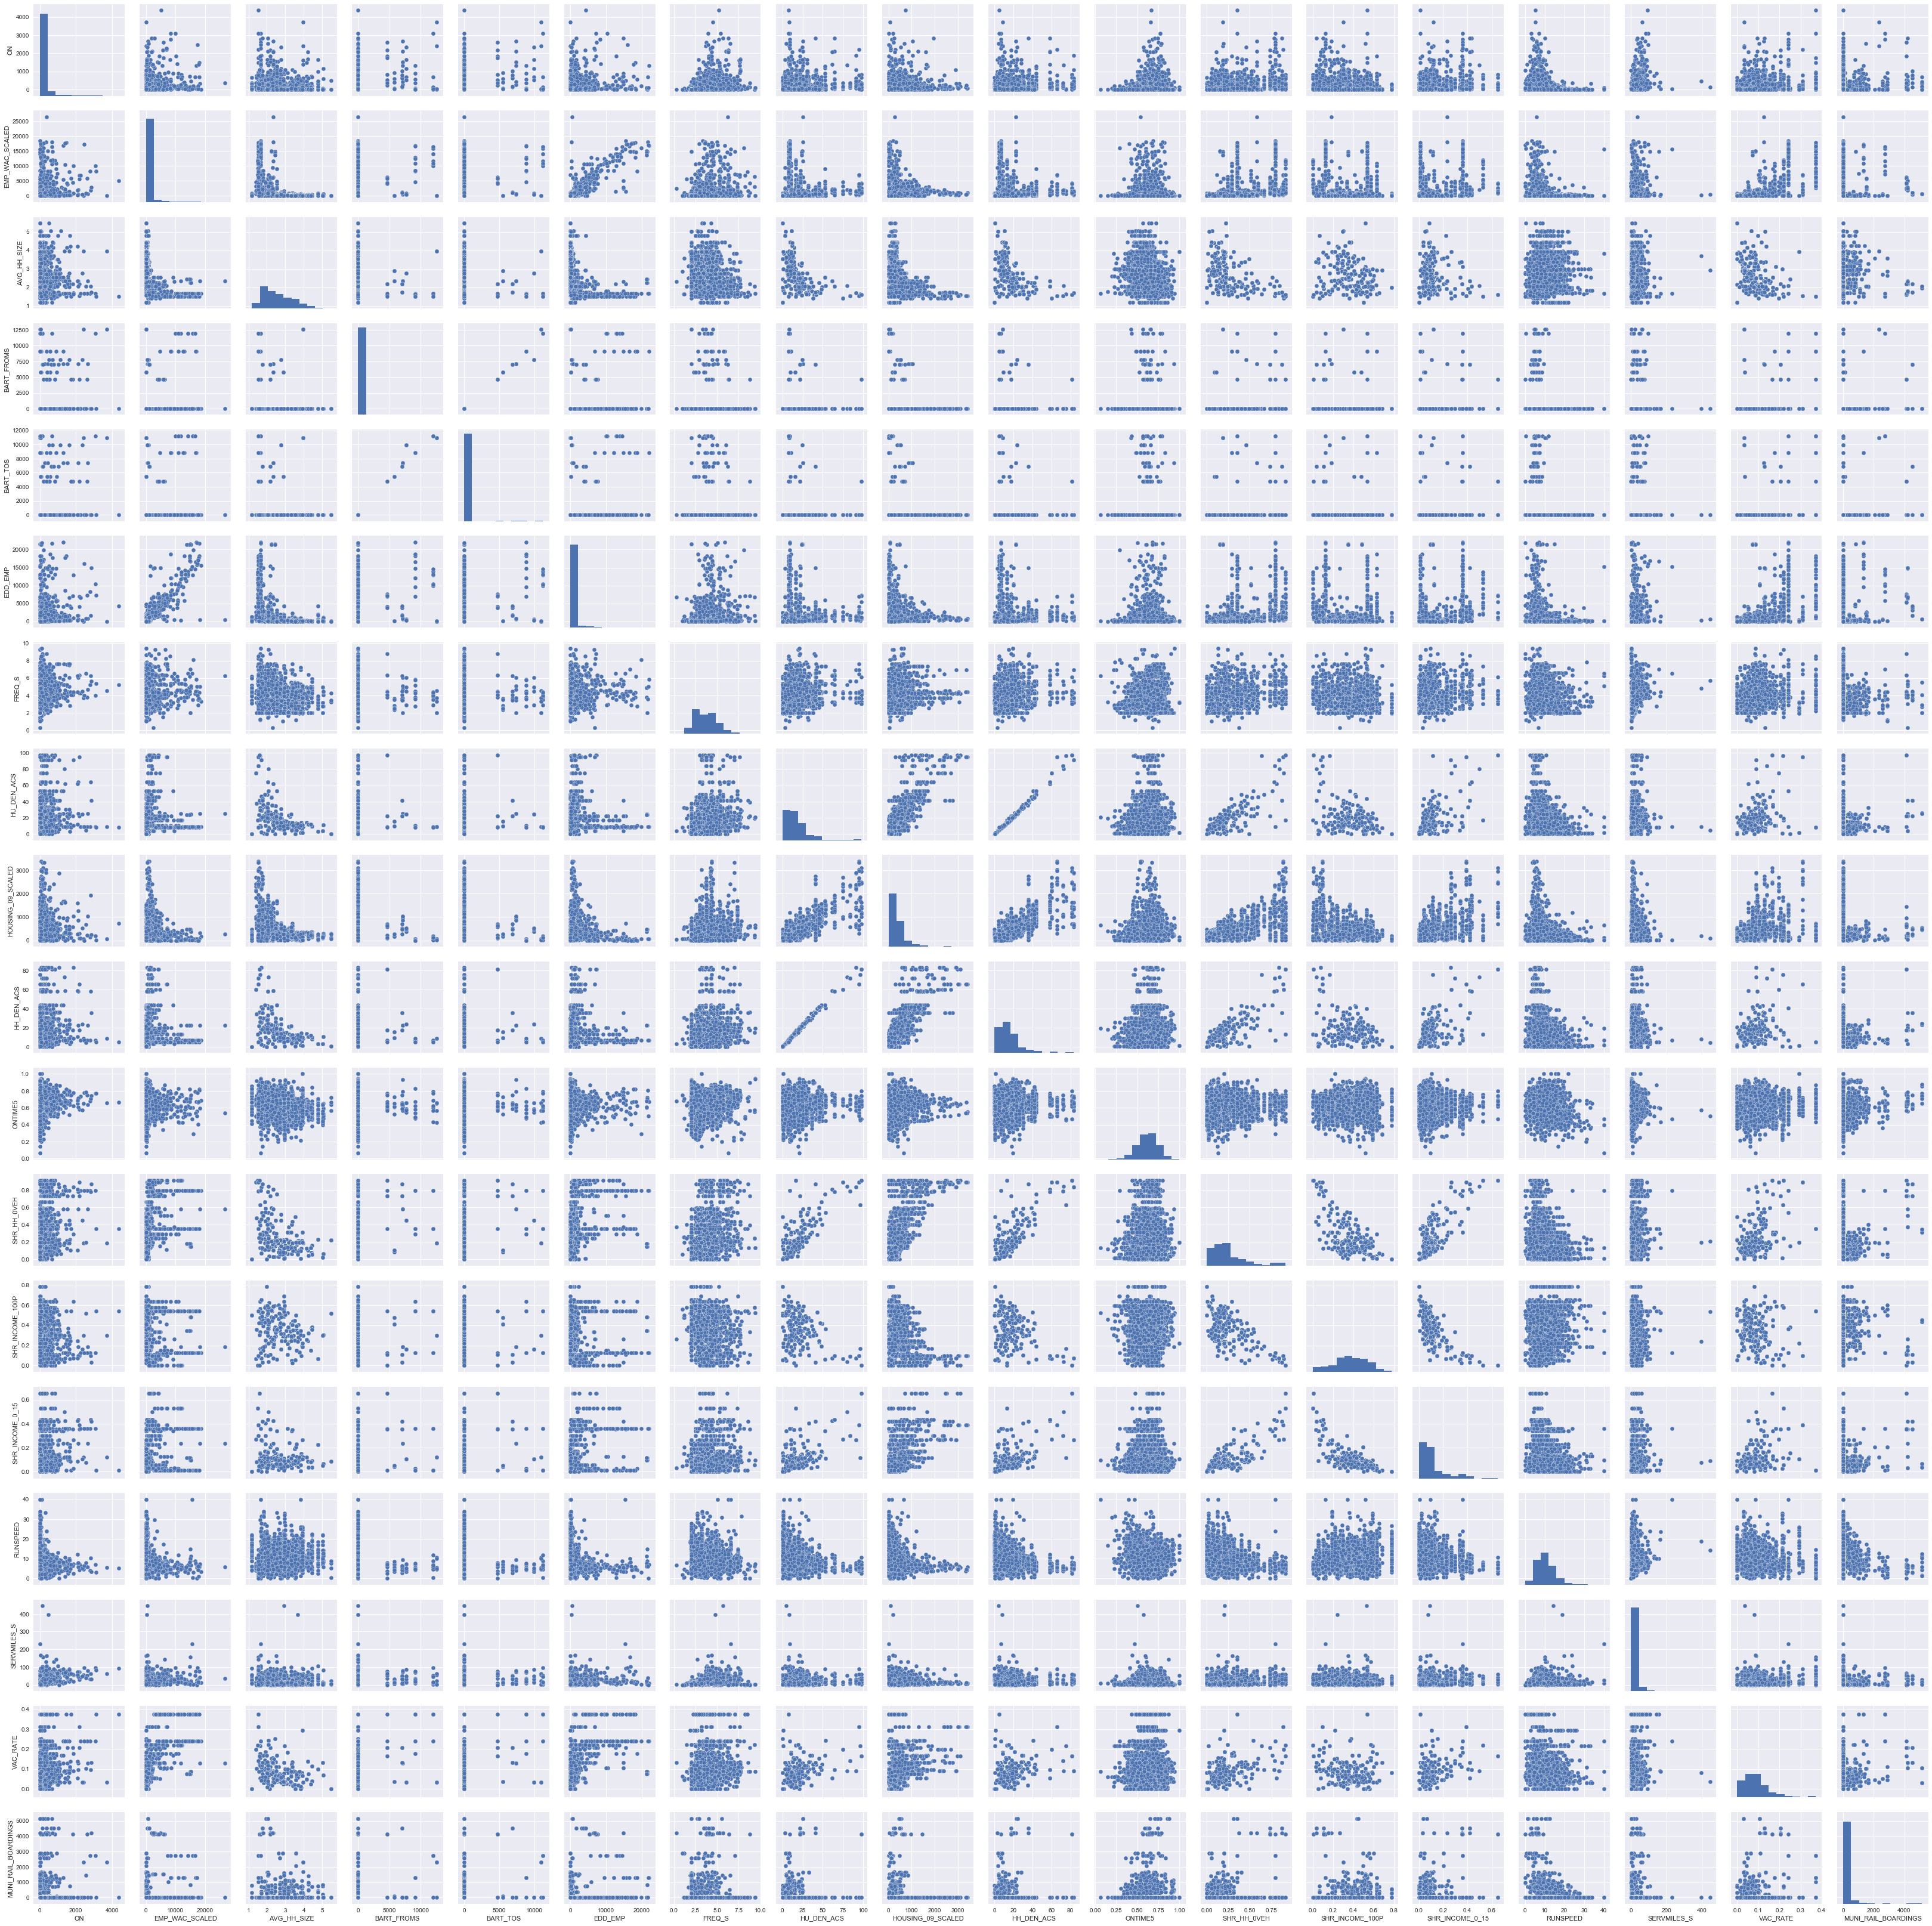

In [603]:
# look at pair plots
pairing_estimate = pd.DataFrame()
convert = ['ON','EMP_WAC_SCALED','AVG_HH_SIZE','HOURLY_AVG_ON_PARK','BART_FROMS','BART_TOS','EDD_EMP','FARE','FREQ_S','HU_DEN_ACS','HOUSING_09_SCALED','HH_DEN_ACS','ONTIME5','SHR_HH_0VEH','SHR_INCOME_100P','SHR_INCOME_0_15','RUNSPEED','SERVMILES_S','VAC_RATE','MUNI_RAIL_BOARDINGS']
pairing_estimate = estimate[convert].dropna()
print(len(pairing_estimate))
fig = sns.pairplot(pairing_estimate[['ON','EMP_WAC_SCALED','AVG_HH_SIZE','BART_FROMS','BART_TOS','EDD_EMP','FREQ_S','HU_DEN_ACS','HOUSING_09_SCALED','HH_DEN_ACS','ONTIME5','SHR_HH_0VEH','SHR_INCOME_100P','SHR_INCOME_0_15','RUNSPEED','SERVMILES_S','VAC_RATE','MUNI_RAIL_BOARDINGS']])
fig.savefig('pair_plot.jpg')

In [604]:
for column in estimate.columns:
    print(column)

ARRIVAL_TIME_DEV
AVG_HH_SIZE
HOURLY_AVG_ON_PARK
BART_FROMS
BART_TOS
BIKERACK
CALTRAIN_OFF
CALTRAIN_ON
CAPACITY
CROWDED
CROWDHOURS
TRANSBAY
DEPARTURE_TIME_DEV
DOORCYCLES
DOW
DWELL
DWELL_S
EDD_EMP
EDHLTH_RAC_SCALED
EDHLTH_WAC_SCALED
EMP_RAC_SCALED
EMP_WAC_SCALED
EOL
FARE
FREQ_S
FULLFARE_REV
HEADWAY_S
HH_DEN_ACS
HOUSING_09_SCALED
HU_DEN_ACS
LEISER_RAC_SCALED
LEISER_WAC_SCALED
LOAD_ARR
LOAD_DEP
MUNI_RAIL_ALIGHTINGS
MUNI_RAIL_BOARDINGS
NUMDAYS
NUM_BUS_STOPS
OBSDAYS
OBS_TRIP_STOPS
OCC_RATE
OFF
ON
ONTIME5
OTHER_RAC_SCALED
OTHER_WAC_SCALED
PASSDELAY_ARR
PASSDELAY_DEP
PASSHOURS
PASSMILES
SHR_HH_0VEH
SHR_INCOME_0_15
SHR_INCOME_100P
SHR_INCOME_15_50
SHR_INCOME_50_100
POP_DEN_ACS
12_HR_OFF_PUB_PARK
1_HR_OFF_PUB_PARK
2_HR_OFF_PUB_PARK
3_HR_OFF_PUB_PARK
4_HR_OFF_PUB_PARK
DAY_OFF_PUB_PARK
DAY_DISCOUNT_OFF_PUB_PARK
RDBRDNGS
RETAIL_RAC_SCALED
RETAIL_WAC_SCALED
RUNSPEED
RUNSPEED_S
RUNTIME
RUNTIME_S
SERVMILES
SERVMILES_S
SOL
STOP_ID
TIMEPOINT
TOTSPEED
TOTSPEED_S
TOTTIME
TOTTIME_S
TRIP_STOPS
Total_Housing

In [605]:
# RUN 21
# back to preferred model, but with missing data dropped
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HH_DEN_ACS \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     205.1
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:10:39   Log-Likelihood:                -24697.
No. Observations:                3547   AIC:                         4.941e+04
Df Residuals:                    3537   BIC:                         4.948e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
EMP_WAC_SCALED     0.0138      0.002      5.

In [606]:
# RUN 22
# test 0 vehicle households
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HH_DEN_ACS \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     194.0
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:10:39   Log-Likelihood:                -24671.
No. Observations:                3547   AIC:                         4.936e+04
Df Residuals:                    3536   BIC:                         4.943e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
EMP_WAC_SCALED     0.0052      0.003      2.

In [631]:
# RUN 23
# test average household size
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HH_DEN_ACS \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       + AVG_HH_SIZE \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     177.8
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:14:10   Log-Likelihood:                -24671.
No. Observations:                3547   AIC:                         4.937e+04
Df Residuals:                    3535   BIC:                         4.944e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
EMP_WAC_SCALED     0.0050      0.003      1.

In [632]:
# RUN 23
# test pop den instead of hh den
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + POP_DEN_ACS \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     192.9
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:14:10   Log-Likelihood:                -24675.
No. Observations:                3547   AIC:                         4.937e+04
Df Residuals:                    3536   BIC:                         4.944e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
EMP_WAC_SCALED     0.0072      0.003      2.

In [633]:
# RUN 25
# test housing units for consistency with change data
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HU_DEN_ACS \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     194.4
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:14:10   Log-Likelihood:                -24670.
No. Observations:                3547   AIC:                         4.936e+04
Df Residuals:                    3536   BIC:                         4.943e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
EMP_WAC_SCALED     0.0051      0.003      1.

In [634]:
# RUN 26
# test housing units for consistency with change data -- at census block level
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     193.7
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:14:10   Log-Likelihood:                -24672.
No. Observations:                3547   AIC:                         4.937e+04
Df Residuals:                    3536   BIC:                         4.943e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
EMP_WAC_SCALED        0.0058      0.00

In [635]:
for column in estimate.columns.sort_values():
    print(column)

12_HR_OFF_PUB_PARK
1_HR_OFF_PUB_PARK
2_HR_OFF_PUB_PARK
3_HR_OFF_PUB_PARK
4_HR_OFF_PUB_PARK
ARRIVAL_TIME_DEV
AVG_HH_SIZE
AVG_RIDE
AVG_TT_TO_WORK_MINUTES
BART_FROMS
BART_TOS
BIKERACK
CALTRAIN_OFF
CALTRAIN_ON
CAPACITY
CROWDED
CROWDHOURS
DAY_DISCOUNT_OFF_PUB_PARK
DAY_OFF_PUB_PARK
DEPARTURE_TIME_DEV
DOORCYCLES
DOW
DWELL
DWELL_S
EDD_EMP
EDHLTH_RAC_SCALED
EDHLTH_WAC_SCALED
EMP_RAC_SCALED
EMP_WAC_SCALED
EOL
FARE
FREQ_S
FULLFARE_REV
HEADWAY_S
HH_DEN_ACS
HOURLY_AVG_ON_PARK
HOUSING_09_SCALED
HU_DEN_ACS
LEISER_RAC_SCALED
LEISER_WAC_SCALED
LOAD_ARR
LOAD_DEP
LOG_RIDERS
MUNI_RAIL_ALIGHTINGS
MUNI_RAIL_BOARDINGS
NUMDAYS
NUM_BUS_STOPS
OBSDAYS
OBS_TRIP_STOPS
OCC_RATE
OFF
ON
ONTIME5
OTHER_RAC_SCALED
OTHER_WAC_SCALED
PARKING_RATE_OFF_RESIDENTIAL
PASSDELAY_ARR
PASSDELAY_DEP
PASSHOURS
PASSMILES
POP_DEN_ACS
RDBRDNGS
RETAIL_RAC_SCALED
RETAIL_WAC_SCALED
RUNSPEED
RUNSPEED_S
RUNTIME
RUNTIME_S
SERVMILES
SERVMILES_S
SHR_HH_0VEH
SHR_INCOME_0_15
SHR_INCOME_100P
SHR_INCOME_15_50
SHR_INCOME_50_100
SOL
STOP_ID
TIMEPOINT

In [636]:
# RUN 27
# add income groups
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_0_15 \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     177.8
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:14:10   Log-Likelihood:                -24671.
No. Observations:                3547   AIC:                         4.937e+04
Df Residuals:                    3535   BIC:                         4.944e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
EMP_WAC_SCALED        0.0063      0.00

In [637]:
# RUN 27
# add income groups
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_0_15 \
                       + SHR_INCOME_15_50 \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     164.2
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:14:10   Log-Likelihood:                -24670.
No. Observations:                3547   AIC:                         4.937e+04
Df Residuals:                    3534   BIC:                         4.945e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
EMP_WAC_SCALED        0.0059      0.00

In [638]:
# RUN 27
# add income groups and drop competing stops because of a high p value (low t stat)
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_100P \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     200.0
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:14:11   Log-Likelihood:                -24650.
No. Observations:                3547   AIC:                         4.932e+04
Df Residuals:                    3536   BIC:                         4.939e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
EMP_WAC_SCALED        0.0097      0.00

In [639]:
# RUN 30
# add income groups
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_0_15 \
                       + SHR_INCOME_100P \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     183.4
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:14:11   Log-Likelihood:                -24650.
No. Observations:                3547   AIC:                         4.932e+04
Df Residuals:                    3535   BIC:                         4.940e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
EMP_WAC_SCALED        0.0096      0.00

In [640]:
for column in estimate.columns.sort_values():
    print(column)

12_HR_OFF_PUB_PARK
1_HR_OFF_PUB_PARK
2_HR_OFF_PUB_PARK
3_HR_OFF_PUB_PARK
4_HR_OFF_PUB_PARK
ARRIVAL_TIME_DEV
AVG_HH_SIZE
AVG_RIDE
AVG_TT_TO_WORK_MINUTES
BART_FROMS
BART_TOS
BIKERACK
CALTRAIN_OFF
CALTRAIN_ON
CAPACITY
CROWDED
CROWDHOURS
DAY_DISCOUNT_OFF_PUB_PARK
DAY_OFF_PUB_PARK
DEPARTURE_TIME_DEV
DOORCYCLES
DOW
DWELL
DWELL_S
EDD_EMP
EDHLTH_RAC_SCALED
EDHLTH_WAC_SCALED
EMP_RAC_SCALED
EMP_WAC_SCALED
EOL
FARE
FREQ_S
FULLFARE_REV
HEADWAY_S
HH_DEN_ACS
HOURLY_AVG_ON_PARK
HOUSING_09_SCALED
HU_DEN_ACS
LEISER_RAC_SCALED
LEISER_WAC_SCALED
LOAD_ARR
LOAD_DEP
LOG_RIDERS
MUNI_RAIL_ALIGHTINGS
MUNI_RAIL_BOARDINGS
NUMDAYS
NUM_BUS_STOPS
OBSDAYS
OBS_TRIP_STOPS
OCC_RATE
OFF
ON
ONTIME5
OTHER_RAC_SCALED
OTHER_WAC_SCALED
PARKING_RATE_OFF_RESIDENTIAL
PASSDELAY_ARR
PASSDELAY_DEP
PASSHOURS
PASSMILES
POP_DEN_ACS
RDBRDNGS
RETAIL_RAC_SCALED
RETAIL_WAC_SCALED
RUNSPEED
RUNSPEED_S
RUNTIME
RUNTIME_S
SERVMILES
SERVMILES_S
SHR_HH_0VEH
SHR_INCOME_0_15
SHR_INCOME_100P
SHR_INCOME_15_50
SHR_INCOME_50_100
SOL
STOP_ID
TIMEPOINT

In [641]:
# RUN
# these are the basic variables we want, so let's start from here...
mod = smf.formula.ols(formula="ON \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_100P \
                       + MUNI_RAIL_BOARDINGS \
                       + CALTRAIN_ON \
                       + PARKING_RATE_OFF_RESIDENTIAL \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ON   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     152.9
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:14:11   Log-Likelihood:                -20649.
No. Observations:                3038   AIC:                         4.133e+04
Df Residuals:                    3023   BIC:                         4.142e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
EMP_WAC_SCALED  

In [642]:
# try average of ONS and OFFS
estimate['AVG_RIDE'] = (estimate['ON'] + estimate['OFF'])/2

In [643]:
estimate.head()

,ARRIVAL_TIME_DEV,AVG_HH_SIZE,HOURLY_AVG_ON_PARK,BART_FROMS,BART_TOS,BIKERACK,CALTRAIN_OFF,CALTRAIN_ON,CAPACITY,CROWDED,CROWDHOURS,TRANSBAY,DEPARTURE_TIME_DEV,DOORCYCLES,DOW,DWELL,DWELL_S,EDD_EMP,EDHLTH_RAC_SCALED,EDHLTH_WAC_SCALED,EMP_RAC_SCALED,EMP_WAC_SCALED,EOL,FARE,FREQ_S,FULLFARE_REV,HEADWAY_S,HH_DEN_ACS,HOUSING_09_SCALED,HU_DEN_ACS,LEISER_RAC_SCALED,LEISER_WAC_SCALED,LOAD_ARR,LOAD_DEP,MUNI_RAIL_ALIGHTINGS,MUNI_RAIL_BOARDINGS,NUMDAYS,NUM_BUS_STOPS,OBSDAYS,OBS_TRIP_STOPS,OCC_RATE,OFF,ON,ONTIME5,OTHER_RAC_SCALED,OTHER_WAC_SCALED,PASSDELAY_ARR,PASSDELAY_DEP,PASSHOURS,PASSMILES,SHR_HH_0VEH,SHR_INCOME_0_15,SHR_INCOME_100P,SHR_INCOME_15_50,SHR_INCOME_50_100,POP_DEN_ACS,12_HR_OFF_PUB_PARK,1_HR_OFF_PUB_PARK,2_HR_OFF_PUB_PARK,3_HR_OFF_PUB_PARK,4_HR_OFF_PUB_PARK,DAY_OFF_PUB_PARK,DAY_DISCOUNT_OFF_PUB_PARK,RDBRDNGS,RETAIL_RAC_SCALED,RETAIL_WAC_SCALED,RUNSPEED,RUNSPEED_S,RUNTIME,RUNTIME_S,SERVMILES,SERVMILES_S,SOL,STOP_ID,TIMEPOINT,TOTSPEED,TOTSPEED_S,TOTTIME,TOTTIME_S,TRIP_STOPS,Total_Housing_Units,Total_Pop,VAC_RATE,VC,WAITHOURS,WGT_TRIP_STOPS,WHEELCHAIR,AVG_TT_TO_WORK_MINUTES,PARKING_RATE_OFF_RESIDENTIAL,AVG_RIDE,LOG_RIDERS
0,1.072379,1.518732,317.0,0.0,0.0,0.206557,0.0,0.0,645.034091,0.017570,1.017228,0.0,1.081051,3.523233,1.0,0.547391,0.0,6419.0,5.495661,58.078897,41.584791,3994.976236,0.0,2.0,4.661654,29.994176,12.870968,4.988566,12.908306,7.957266,3.736130,170.357958,1162.028642,1172.506037,0.0,0.0,21.0,5.0,21.000000,9.500000,0.626920,4.519693,14.997088,0.650636,27.184539,3706.208163,25.339884,26.938116,18.063030,79.017948,0.354467,0.008646,0.537464,0.324207,0.129683,7.576295,1700.0,1700.0,1700.0,1700.0,1700.0,1700.0,1361.5,0.0,5.168461,60.331218,5.225000,5.890000,48.905914,43.610000,4.284000,4.284000,0.0,3001,1.0,5.225000,5.890000,49.453304,43.610000,63.000000,1107.0,1054.0,0.373080,0.292776,1.322061,63.000000,0.000000,20.9,0.717403,9.758390,2.375686
1,1.078691,2.065783,306.0,0.0,0.0,0.000000,0.0,0.0,707.079545,0.032016,1.242915,0.0,1.222782,54.225016,1.0,8.853592,0.0,1790.0,29.458089,7.142484,178.682736,2234.048853,0.0,2.0,3.957977,116.962396,15.159260,14.928489,373.257441,19.157128,14.819414,170.376866,1029.535938,1069.379807,0.0,0.0,20.0,2.0,19.333333,10.666667,0.779265,18.637329,58.481198,0.765185,122.031086,2013.646230,142.701903,157.240873,11.191763,102.946060,0.242023,0.055228,0.572901,0.179921,0.191949,30.839019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.374148,42.883273,9.453333,8.970000,30.279509,40.966667,6.125866,6.133333,0.0,3003,0.0,9.453333,8.970000,39.133100,40.966667,61.333333,5228.0,8416.0,0.220735,0.266768,6.057064,61.264825,0.027273,28.0,1.052738,38.559264,3.677800
2,0.784972,2.065783,259.0,0.0,0.0,0.000000,0.0,0.0,650.427273,0.021341,0.742227,0.0,0.876414,46.365203,1.0,5.179305,0.0,1962.0,24.969005,9.815646,155.763117,2304.434218,0.0,2.0,3.924525,17.756451,15.288476,14.928489,337.261868,19.157128,13.882961,198.725335,1030.624931,986.353120,0.0,0.0,20.0,2.0,19.333333,9.333333,0.779265,53.150037,8.878226,0.619521,105.719980,2037.073972,21.929398,23.462475,11.151654,127.021696,0.242023,0.055228,0.572901,0.179921,0.191949,30.839019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11.191171,58.819265,12.550000,8.436667,29.535586,50.666667,6.988946,6.997667,0.0,3004,0.0,12.550000,8.436667,34.714891,50.666667,55.666667,5228.0,8416.0,0.220735,0.291287,0.923621,55.626478,0.435076,28.0,0.687620,31.014131,3.466177
3,1.461916,2.065783,201.0,0.0,0.0,0.000000,0.0,0.0,695.863636,0.020189,1.715733,0.0,1.519154,46.449831,1.0,3.960755,0.0,2308.0,35.387230,32.591849,195.821254,1642.640451,0.0,2.0,4.689655,76.532875,12.794118,14.928489,400.041558,19.157128,21.618292,143.046000,1208.859372,1237.790631,0.0,0.0,21.0,2.0,21.000000,11.000000,0.779265,9.335179,38.266437,0.785108,128.713499,1380.310734,67.033429,70.370534,24.386948,171.658031,0.242023,0.055228,0.572901,0.179921,0.191949,30.839019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10.102233,86.691869,7.340000,9.070000,76.505714,64.820000,9.798000,9.798000,0.0,3005,0.0,7.340000,9.070000,80.466470,64.820000,69.

In [707]:
# RUN
# test average riders

mod = smf.formula.ols(formula="AVG_RIDE \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_100P \
                       + MUNI_RAIL_BOARDINGS \
                       + CALTRAIN_ON \
                       + PARKING_RATE_OFF_RESIDENTIAL \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               AVG_RIDE   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     178.7
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:44:12   Log-Likelihood:                -20329.
No. Observations:                3038   AIC:                         4.069e+04
Df Residuals:                    3023   BIC:                         4.078e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
EMP_WAC_SCALED  

In [645]:
# test log of average riders
estimate['LOG_RIDERS'] = np.log(estimate.AVG_RIDE + 1)

In [646]:
# RUN
# test log average riders

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_100P \
                       + MUNI_RAIL_BOARDINGS \
                       + CALTRAIN_ON \
                       + PARKING_RATE_OFF_RESIDENTIAL \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     2389.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:14:12   Log-Likelihood:                -4697.7
No. Observations:                3038   AIC:                             9425.
Df Residuals:                    3023   BIC:                             9516.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
EMP_WAC_SCALED  

In [647]:
# RUN
# test log average riders

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_100P \
                       + CALTRAIN_ON \
                       + PARKING_RATE_OFF_RESIDENTIAL \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     2560.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:14:12   Log-Likelihood:                -4697.7
No. Observations:                3038   AIC:                             9423.
Df Residuals:                    3024   BIC:                             9508.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
EMP_WAC_SCALED  

In [648]:
# RUN
# test log average riders

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_100P \
                       + PARKING_RATE_OFF_RESIDENTIAL \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     2757.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:14:12   Log-Likelihood:                -4698.2
No. Observations:                3038   AIC:                             9422.
Df Residuals:                    3025   BIC:                             9501.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
EMP_WAC_SCALED  

In [649]:
# RUN
# try low income but the p value is worst

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_0_15 \
                       + PARKING_RATE_OFF_RESIDENTIAL \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     2755.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:14:12   Log-Likelihood:                -4699.1
No. Observations:                3038   AIC:                             9424.
Df Residuals:                    3025   BIC:                             9502.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
EMP_WAC_SCALED  

In [650]:
# RUN
# go back to before but without parking

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED \
                       + HOUSING_09_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + RUNSPEED \
                       + NUM_BUS_STOPS \
                       + TRANSBAY \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_100P \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     3331.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:14:12   Log-Likelihood:                -5608.1
No. Observations:                3547   AIC:                         1.124e+04
Df Residuals:                    3535   BIC:                         1.131e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
EMP_WAC_SCALED    -9.244e-06   1.21e-0

In [651]:
# RUN
# try different employment categories
mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED \
                       + RETAIL_WAC_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + BART_FROMS \
                       + TRANSBAY \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_100P \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     3775.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:14:13   Log-Likelihood:                -5702.0
No. Observations:                3547   AIC:                         1.142e+04
Df Residuals:                    3537   BIC:                         1.149e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
EMP_WAC_SCALED     -3.01e-07   1.19e-0

In [652]:
# RUN
# try different employment categories
mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED \
                       + RETAIL_WAC_SCALED \
                       + LEISER_WAC_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + BART_FROMS \
                       + TRANSBAY \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_100P \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     3431.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:14:13   Log-Likelihood:                -5701.9
No. Observations:                3547   AIC:                         1.143e+04
Df Residuals:                    3536   BIC:                         1.149e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
EMP_WAC_SCALED     1.585e-06   1.29e-0

In [654]:
#RUN
# try different employment categories
mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ RETAIL_WAC_SCALED \
                       + LEISER_WAC_SCALED \
                       + EDHLTH_WAC_SCALED \
                       + OTHER_WAC_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + BART_FROMS \
                       + TRANSBAY \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_100P \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     3186.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:14:13   Log-Likelihood:                -5650.4
No. Observations:                3529   AIC:                         1.132e+04
Df Residuals:                    3517   BIC:                         1.140e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
RETAIL_WAC_SCALED     0.0006      0.00

In [655]:
estimate['NONRETAIL_DEN_WAC'] = estimate.EMP_WAC_SCALED - estimate.RETAIL_WAC_SCALED

In [656]:
# RUN
# test retail vs non-retail density
mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ RETAIL_WAC_SCALED \
                       + NONRETAIL_DEN_WAC \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + BART_FROMS \
                       + SHR_HH_0VEH \
                       + TRANSBAY \
                       + SHR_INCOME_100P \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     3775.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:14:14   Log-Likelihood:                -5702.0
No. Observations:                3547   AIC:                         1.142e+04
Df Residuals:                    3537   BIC:                         1.149e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
RETAIL_WAC_SCALED     0.0006      0.00

In [657]:
estimate.columns

Index(['ARRIVAL_TIME_DEV', 'AVG_HH_SIZE', 'HOURLY_AVG_ON_PARK', 'BART_FROMS',
       'BART_TOS', 'BIKERACK', 'CALTRAIN_OFF', 'CALTRAIN_ON', 'CAPACITY',
       'CROWDED', 'CROWDHOURS', 'TRANSBAY', 'DEPARTURE_TIME_DEV', 'DOORCYCLES',
       'DOW', 'DWELL', 'DWELL_S', 'EDD_EMP', 'EDHLTH_RAC_SCALED',
       'EDHLTH_WAC_SCALED', 'EMP_RAC_SCALED', 'EMP_WAC_SCALED', 'EOL', 'FARE',
       'FREQ_S', 'FULLFARE_REV', 'HEADWAY_S', 'HH_DEN_ACS',
       'HOUSING_09_SCALED', 'HU_DEN_ACS', 'LEISER_RAC_SCALED',
       'LEISER_WAC_SCALED', 'LOAD_ARR', 'LOAD_DEP', 'MUNI_RAIL_ALIGHTINGS',
       'MUNI_RAIL_BOARDINGS', 'NUMDAYS', 'NUM_BUS_STOPS', 'OBSDAYS',
       'OBS_TRIP_STOPS', 'OCC_RATE', 'OFF', 'ON', 'ONTIME5',
       'OTHER_RAC_SCALED', 'OTHER_WAC_SCALED', 'PASSDELAY_ARR',
       'PASSDELAY_DEP', 'PASSHOURS', 'PASSMILES', 'SHR_HH_0VEH',
       'SHR_INCOME_0_15', 'SHR_INCOME_100P', 'SHR_INCOME_15_50',
       'SHR_INCOME_50_100', 'POP_DEN_ACS', '12_HR_OFF_PUB_PARK',
       '1_HR_OFF_PUB_PARK', '2_HR_O

In [658]:
estimate['AVG_BART'] = (estimate['BART_FROMS']+estimate['BART_TOS'])/2

In [659]:
for column in estimate.columns:
    print(column)

ARRIVAL_TIME_DEV
AVG_HH_SIZE
HOURLY_AVG_ON_PARK
BART_FROMS
BART_TOS
BIKERACK
CALTRAIN_OFF
CALTRAIN_ON
CAPACITY
CROWDED
CROWDHOURS
TRANSBAY
DEPARTURE_TIME_DEV
DOORCYCLES
DOW
DWELL
DWELL_S
EDD_EMP
EDHLTH_RAC_SCALED
EDHLTH_WAC_SCALED
EMP_RAC_SCALED
EMP_WAC_SCALED
EOL
FARE
FREQ_S
FULLFARE_REV
HEADWAY_S
HH_DEN_ACS
HOUSING_09_SCALED
HU_DEN_ACS
LEISER_RAC_SCALED
LEISER_WAC_SCALED
LOAD_ARR
LOAD_DEP
MUNI_RAIL_ALIGHTINGS
MUNI_RAIL_BOARDINGS
NUMDAYS
NUM_BUS_STOPS
OBSDAYS
OBS_TRIP_STOPS
OCC_RATE
OFF
ON
ONTIME5
OTHER_RAC_SCALED
OTHER_WAC_SCALED
PASSDELAY_ARR
PASSDELAY_DEP
PASSHOURS
PASSMILES
SHR_HH_0VEH
SHR_INCOME_0_15
SHR_INCOME_100P
SHR_INCOME_15_50
SHR_INCOME_50_100
POP_DEN_ACS
12_HR_OFF_PUB_PARK
1_HR_OFF_PUB_PARK
2_HR_OFF_PUB_PARK
3_HR_OFF_PUB_PARK
4_HR_OFF_PUB_PARK
DAY_OFF_PUB_PARK
DAY_DISCOUNT_OFF_PUB_PARK
RDBRDNGS
RETAIL_RAC_SCALED
RETAIL_WAC_SCALED
RUNSPEED
RUNSPEED_S
RUNTIME
RUNTIME_S
SERVMILES
SERVMILES_S
SOL
STOP_ID
TIMEPOINT
TOTSPEED
TOTSPEED_S
TOTTIME
TOTTIME_S
TRIP_STOPS
Total_Housing

In [660]:
# RUN
# test retail vs non-retail density
mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ RETAIL_WAC_SCALED \
                       + NONRETAIL_DEN_WAC \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + AVG_BART \
                       + SHR_HH_0VEH \
                       + TRANSBAY \
                       + SHR_INCOME_100P \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     3777.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:14:14   Log-Likelihood:                -5701.1
No. Observations:                3547   AIC:                         1.142e+04
Df Residuals:                    3537   BIC:                         1.148e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
RETAIL_WAC_SCALED     0.0006      0.00

In [661]:
for column in estimate.columns.sort_values():
    print(column)

12_HR_OFF_PUB_PARK
1_HR_OFF_PUB_PARK
2_HR_OFF_PUB_PARK
3_HR_OFF_PUB_PARK
4_HR_OFF_PUB_PARK
ARRIVAL_TIME_DEV
AVG_BART
AVG_HH_SIZE
AVG_RIDE
AVG_TT_TO_WORK_MINUTES
BART_FROMS
BART_TOS
BIKERACK
CALTRAIN_OFF
CALTRAIN_ON
CAPACITY
CROWDED
CROWDHOURS
DAY_DISCOUNT_OFF_PUB_PARK
DAY_OFF_PUB_PARK
DEPARTURE_TIME_DEV
DOORCYCLES
DOW
DWELL
DWELL_S
EDD_EMP
EDHLTH_RAC_SCALED
EDHLTH_WAC_SCALED
EMP_RAC_SCALED
EMP_WAC_SCALED
EOL
FARE
FREQ_S
FULLFARE_REV
HEADWAY_S
HH_DEN_ACS
HOURLY_AVG_ON_PARK
HOUSING_09_SCALED
HU_DEN_ACS
LEISER_RAC_SCALED
LEISER_WAC_SCALED
LOAD_ARR
LOAD_DEP
LOG_RIDERS
MUNI_RAIL_ALIGHTINGS
MUNI_RAIL_BOARDINGS
NONRETAIL_DEN_WAC
NUMDAYS
NUM_BUS_STOPS
OBSDAYS
OBS_TRIP_STOPS
OCC_RATE
OFF
ON
ONTIME5
OTHER_RAC_SCALED
OTHER_WAC_SCALED
PARKING_RATE_OFF_RESIDENTIAL
PASSDELAY_ARR
PASSDELAY_DEP
PASSHOURS
PASSMILES
POP_DEN_ACS
RDBRDNGS
RETAIL_RAC_SCALED
RETAIL_WAC_SCALED
RUNSPEED
RUNSPEED_S
RUNTIME
RUNTIME_S
SERVMILES
SERVMILES_S
SHR_HH_0VEH
SHR_INCOME_0_15
SHR_INCOME_100P
SHR_INCOME_15_50
SHR_INCOME_5

In [662]:
# RUN
# trying different income categories in the next few
mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_15_50 \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     5303.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:14:15   Log-Likelihood:                -5730.9
No. Observations:                3547   AIC:                         1.148e+04
Df Residuals:                    3540   BIC:                         1.152e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
EMP_WAC_SCALED    4.531e-05    1.1e-05  

In [663]:
# RUN

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_50_100 \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     5398.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:14:15   Log-Likelihood:                -5702.0
No. Observations:                3547   AIC:                         1.142e+04
Df Residuals:                    3540   BIC:                         1.146e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
EMP_WAC_SCALED      5.67e-05    1.1e-0

In [664]:
# RUN
# this seems to be the preferred model for now...
#the 100P is the easiest to explain but the 50k to 100k has the highest t statistic

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED \
                       + ONTIME5 \
                       + FREQ_S \
                       + EOL\
                       + SOL \
                       + SHR_HH_0VEH \
                       + SHR_INCOME_100P \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())
res.save('Model.jpg')

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     5251.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:14:16   Log-Likelihood:                -5746.7
No. Observations:                3547   AIC:                         1.151e+04
Df Residuals:                    3540   BIC:                         1.155e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
EMP_WAC_SCALED    4.19e-05   1.11e-05     

In [665]:
columns = ['EMP_WAC_SCALED', 'ONTIME5', 'FREQ_S', 'EOL', 'SOL', 'SHR_HH_0VEH', 'SHR_INCOME_100P']
                       

In [666]:
for column in columns:
    estimate[column + '_LOG'] = np.log(estimate[column] + 1)

In [667]:
estimate.head()

,ARRIVAL_TIME_DEV,AVG_HH_SIZE,HOURLY_AVG_ON_PARK,BART_FROMS,BART_TOS,BIKERACK,CALTRAIN_OFF,CALTRAIN_ON,CAPACITY,CROWDED,CROWDHOURS,TRANSBAY,DEPARTURE_TIME_DEV,DOORCYCLES,DOW,DWELL,DWELL_S,EDD_EMP,EDHLTH_RAC_SCALED,EDHLTH_WAC_SCALED,EMP_RAC_SCALED,EMP_WAC_SCALED,EOL,FARE,FREQ_S,FULLFARE_REV,HEADWAY_S,HH_DEN_ACS,HOUSING_09_SCALED,HU_DEN_ACS,LEISER_RAC_SCALED,LEISER_WAC_SCALED,LOAD_ARR,LOAD_DEP,MUNI_RAIL_ALIGHTINGS,MUNI_RAIL_BOARDINGS,NUMDAYS,NUM_BUS_STOPS,OBSDAYS,OBS_TRIP_STOPS,OCC_RATE,OFF,ON,ONTIME5,OTHER_RAC_SCALED,OTHER_WAC_SCALED,PASSDELAY_ARR,PASSDELAY_DEP,PASSHOURS,PASSMILES,SHR_HH_0VEH,SHR_INCOME_0_15,SHR_INCOME_100P,SHR_INCOME_15_50,SHR_INCOME_50_100,POP_DEN_ACS,12_HR_OFF_PUB_PARK,1_HR_OFF_PUB_PARK,2_HR_OFF_PUB_PARK,3_HR_OFF_PUB_PARK,4_HR_OFF_PUB_PARK,DAY_OFF_PUB_PARK,DAY_DISCOUNT_OFF_PUB_PARK,RDBRDNGS,RETAIL_RAC_SCALED,RETAIL_WAC_SCALED,RUNSPEED,RUNSPEED_S,RUNTIME,RUNTIME_S,SERVMILES,SERVMILES_S,SOL,STOP_ID,TIMEPOINT,TOTSPEED,TOTSPEED_S,TOTTIME,TOTTIME_S,TRIP_STOPS,Total_Housing_Units,Total_Pop,VAC_RATE,VC,WAITHOURS,WGT_TRIP_STOPS,WHEELCHAIR,AVG_TT_TO_WORK_MINUTES,PARKING_RATE_OFF_RESIDENTIAL,AVG_RIDE,LOG_RIDERS,NONRETAIL_DEN_WAC,AVG_BART,EMP_WAC_SCALED_LOG,ONTIME5_LOG,FREQ_S_LOG,EOL_LOG,SOL_LOG,SHR_HH_0VEH_LOG,SHR_INCOME_100P_LOG
0,1.072379,1.518732,317.0,0.0,0.0,0.206557,0.0,0.0,645.034091,0.017570,1.017228,0.0,1.081051,3.523233,1.0,0.547391,0.0,6419.0,5.495661,58.078897,41.584791,3994.976236,0.0,2.0,4.661654,29.994176,12.870968,4.988566,12.908306,7.957266,3.736130,170.357958,1162.028642,1172.506037,0.0,0.0,21.0,5.0,21.000000,9.500000,0.626920,4.519693,14.997088,0.650636,27.184539,3706.208163,25.339884,26.938116,18.063030,79.017948,0.354467,0.008646,0.537464,0.324207,0.129683,7.576295,1700.0,1700.0,1700.0,1700.0,1700.0,1700.0,1361.5,0.0,5.168461,60.331218,5.225000,5.890000,48.905914,43.610000,4.284000,4.284000,0.0,3001,1.0,5.225000,5.890000,49.453304,43.610000,63.000000,1107.0,1054.0,0.373080,0.292776,1.322061,63.000000,0.000000,20.9,0.717403,9.758390,2.375686,3934.645018,0.0,8.293043,0.501161,1.733716,0.0,0.0,0.303408,0.430134
1,1.078691,2.065783,306.0,0.0,0.0,0.000000,0.0,0.0,707.079545,0.032016,1.242915,0.0,1.222782,54.225016,1.0,8.853592,0.0,1790.0,29.458089,7.142484,178.682736,2234.048853,0.0,2.0,3.957977,116.962396,15.159260,14.928489,373.257441,19.157128,14.819414,170.376866,1029.535938,1069.379807,0.0,0.0,20.0,2.0,19.333333,10.666667,0.779265,18.637329,58.481198,0.765185,122.031086,2013.646230,142.701903,157.240873,11.191763,102.946060,0.242023,0.055228,0.572901,0.179921,0.191949,30.839019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.374148,42.883273,9.453333,8.970000,30.279509,40.966667,6.125866,6.133333,0.0,3003,0.0,9.453333,8.970000,39.133100,40.966667,61.333333,5228.0,8416.0,0.220735,0.266768,6.057064,61.264825,0.027273,28.0,1.052738,38.559264,3.677800,2191.165580,0.0,7.712018,0.568255,1.600998,0.0,0.0,0.216741,0.452922
2,0.784972,2.065783,259.0,0.0,0.0,0.000000,0.0,0.0,650.427273,0.021341,0.742227,0.0,0.876414,46.365203,1.0,5.179305,0.0,1962.0,24.969005,9.815646,155.763117,2304.434218,0.0,2.0,3.924525,17.756451,15.288476,14.928489,337.261868,19.157128,13.882961,198.725335,1030.624931,986.353120,0.0,0.0,20.0,2.0,19.333333,9.333333,0.779265,53.150037,8.878226,0.619521,105.719980,2037.073972,21.929398,23.462475,11.151654,127.021696,0.242023,0.055228,0.572901,0.179921,0.191949,30.839019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11.191171,58.819265,12.550000,8.436667,29.535586,50.666667,6.988946,6.997667,0.0,3004,0.0,12.550000,8.436667,34.714891,50.666667,55.666667,5228.0,8416.0,0.220735,0.291287,0.923621,55.626478,0.435076,28.0,0.687620,31.014131,3.466177,2245.614953,0.0,7.743024,0.482130,1.594228,0.0,0.0,0.216741,0.452922
3,1.461916,2.065783,201.0,0.0,0.0,0.000000,0.0,0.0,695.863636,0.020189,1.715733,0.0,1.519154,46.449831,1.0,3.960755,0.0,2308.0,35.387230,32.591849,195.821254,1642.640451,0.0,2.0,4.689655,76.532875,12.794118,14.928489,400.041558,19.157128,21.618292,143.046000,1208.859372,1237.790631,0.0,0.0,21.0,2.0,21.000000,

In [670]:
# RUN
# this seems to be the preferred model for now...
#the 100P is the easiest to explain but the 50k to 100k has the highest t statistic

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED_LOG \
                       + ONTIME5_LOG \
                       + FREQ_S_LOG \
                       + EOL_LOG \
                       + SOL_LOG \
                       + SHR_HH_0VEH_LOG \
                       + SHR_INCOME_100P_LOG \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())
res.save('Model.jpg')

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     5918.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        11:14:07   Log-Likelihood:                -5552.2
No. Observations:                3547   AIC:                         1.112e+04
Df Residuals:                    3540   BIC:                         1.116e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
EMP_WAC_SCALED_LOG      0.2348    

In [678]:
# RUN
# this seems to be the preferred model for now...
#the 100P is the easiest to explain but the 50k to 100k has the highest t statistic

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED_LOG \
                       + FREQ_S_LOG \
                       + EOL_LOG \
                       + SOL_LOG \
                       + SHR_INCOME_100P_LOG \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())
res.save('Model.jpg')

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     8286.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        11:26:20   Log-Likelihood:                -5553.0
No. Observations:                3547   AIC:                         1.112e+04
Df Residuals:                    3542   BIC:                         1.115e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
EMP_WAC_SCALED_LOG      0.2374    

In [681]:
for column in estimate.columns.sort_values():
    print(column)

12_HR_OFF_PUB_PARK
1_HR_OFF_PUB_PARK
2_HR_OFF_PUB_PARK
3_HR_OFF_PUB_PARK
4_HR_OFF_PUB_PARK
ARRIVAL_TIME_DEV
AVG_BART
AVG_HH_SIZE
AVG_RIDE
AVG_TT_TO_WORK_MINUTES
BART_FROMS
BART_TOS
BIKERACK
CALTRAIN_OFF
CALTRAIN_ON
CAPACITY
CROWDED
CROWDHOURS
DAY_DISCOUNT_OFF_PUB_PARK
DAY_OFF_PUB_PARK
DEPARTURE_TIME_DEV
DOORCYCLES
DOW
DWELL
DWELL_S
EDD_EMP
EDHLTH_RAC_SCALED
EDHLTH_WAC_SCALED
EMP_RAC_SCALED
EMP_WAC_SCALED
EMP_WAC_SCALED_LOG
EOL
EOL_LOG
FARE
FREQ_S
FREQ_S_LOG
FULLFARE_REV
HEADWAY_S
HH_DEN_ACS
HOURLY_AVG_ON_PARK
HOUSING_09_SCALED
HU_DEN_ACS
LEISER_RAC_SCALED
LEISER_WAC_SCALED
LOAD_ARR
LOAD_DEP
LOG_RIDERS
MUNI_RAIL_ALIGHTINGS
MUNI_RAIL_BOARDINGS
NONRETAIL_DEN_WAC
NUMDAYS
NUM_BUS_STOPS
OBSDAYS
OBS_TRIP_STOPS
OCC_RATE
OFF
ON
ONTIME5
ONTIME5_LOG
OTHER_RAC_SCALED
OTHER_WAC_SCALED
PARKING_RATE_OFF_RESIDENTIAL
PASSDELAY_ARR
PASSDELAY_DEP
PASSHOURS
PASSMILES
POP_DEN_ACS
RDBRDNGS
RETAIL_RAC_SCALED
RETAIL_WAC_SCALED
RUNSPEED
RUNSPEED_S
RUNTIME
RUNTIME_S
SERVMILES
SERVMILES_S
SHR_HH_0VEH
SHR_HH_0VEH

In [684]:
estimate['CALTRAIN_AVG'] = (estimate.CALTRAIN_OFF + estimate.CALTRAIN_ON)/2
estimate['MUNI_RAIL_AVG'] = (estimate.MUNI_RAIL_ALIGHTINGS + estimate.MUNI_RAIL_BOARDINGS)/2

In [687]:
columns = ['AVG_BART', 'CALTRAIN_AVG', 'HOURLY_AVG_ON_PARK', 'MUNI_RAIL_AVG']
for column in columns:
    estimate[column + '_LOG'] = np.log(estimate[column]+1)

In [694]:
# RUN
# add in Transbay

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED_LOG \
                       + FREQ_S_LOG \
                       + EOL_LOG \
                       + SOL_LOG \
                       + SHR_INCOME_100P_LOG \
                       + TRANSBAY \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     6916.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        11:35:58   Log-Likelihood:                -5549.9
No. Observations:                3547   AIC:                         1.111e+04
Df Residuals:                    3541   BIC:                         1.115e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
EMP_WAC_SCALED_LOG      0.2348    

In [697]:
# RUN
# add in parking

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED_LOG \
                       + FREQ_S_LOG \
                       + EOL_LOG \
                       + SOL_LOG \
                       + SHR_INCOME_100P_LOG \
                       + TRANSBAY \
                       + HOURLY_AVG_ON_PARK_LOG \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     6054.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        11:36:26   Log-Likelihood:                -5513.4
No. Observations:                3546   AIC:                         1.104e+04
Df Residuals:                    3539   BIC:                         1.108e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EMP_WAC_SCALED_LOG         0

In [698]:
# RUN
# add in MUNI Rail

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED_LOG \
                       + FREQ_S_LOG \
                       + EOL_LOG \
                       + SOL_LOG \
                       + SHR_INCOME_100P_LOG \
                       + TRANSBAY \
                       + HOURLY_AVG_ON_PARK_LOG \
                       + MUNI_RAIL_AVG \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     5308.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        11:36:33   Log-Likelihood:                -5509.5
No. Observations:                3546   AIC:                         1.104e+04
Df Residuals:                    3538   BIC:                         1.108e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EMP_WAC_SCALED_LOG         0

In [699]:
# RUN
# add in BART

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED_LOG \
                       + FREQ_S_LOG \
                       + EOL_LOG \
                       + SOL_LOG \
                       + SHR_INCOME_100P_LOG \
                       + TRANSBAY \
                       + HOURLY_AVG_ON_PARK_LOG \
                       + MUNI_RAIL_AVG \
                       + AVG_BART \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     4784.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        11:37:33   Log-Likelihood:                -5486.4
No. Observations:                3546   AIC:                         1.099e+04
Df Residuals:                    3537   BIC:                         1.105e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EMP_WAC_SCALED_LOG         0

In [700]:
# RUN
# add in CALTRAIN

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED_LOG \
                       + FREQ_S_LOG \
                       + EOL_LOG \
                       + SOL_LOG \
                       + SHR_INCOME_100P_LOG \
                       + TRANSBAY \
                       + HOURLY_AVG_ON_PARK_LOG \
                       + MUNI_RAIL_AVG \
                       + AVG_BART \
                       + CALTRAIN_AVG \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     4304.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        11:38:22   Log-Likelihood:                -5486.4
No. Observations:                3546   AIC:                         1.099e+04
Df Residuals:                    3536   BIC:                         1.105e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EMP_WAC_SCALED_LOG         0

In [704]:
# RUN
# drop muni rail and caltrain because they have high p values

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED_LOG \
                       + FREQ_S_LOG \
                       + EOL_LOG \
                       + SOL_LOG \
                       + SHR_INCOME_100P_LOG \
                       + TRANSBAY \
                       + HOURLY_AVG_ON_PARK_LOG \
                       + AVG_BART \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())
res.save('Model.jpg')

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     5381.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        11:51:54   Log-Likelihood:                -5487.1
No. Observations:                3546   AIC:                         1.099e+04
Df Residuals:                    3538   BIC:                         1.104e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EMP_WAC_SCALED_LOG         0

In [705]:
# RUN
# try share of hh with 0 vehicles

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED_LOG \
                       + FREQ_S_LOG \
                       + EOL_LOG \
                       + SOL_LOG \
                       + SHR_INCOME_100P_LOG \
                       + SHR_HH_0VEH \
                       + TRANSBAY \
                       + HOURLY_AVG_ON_PARK_LOG \
                       + AVG_BART \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     4787.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        11:52:15   Log-Likelihood:                -5485.5
No. Observations:                3546   AIC:                         1.099e+04
Df Residuals:                    3537   BIC:                         1.104e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EMP_WAC_SCALED_LOG         0

In [708]:
# RUN
# drop share of hh with 0 vehicles because they have high p values

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EMP_WAC_SCALED_LOG \
                       + FREQ_S_LOG \
                       + EOL \
                       + SOL \
                       + SHR_INCOME_100P_LOG \
                       + TRANSBAY \
                       + HOURLY_AVG_ON_PARK_LOG \
                       + AVG_BART \
                       -1",
             data = estimate)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     5380.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:54:58   Log-Likelihood:                -5487.4
No. Observations:                3546   AIC:                         1.099e+04
Df Residuals:                    3538   BIC:                         1.104e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EMP_WAC_SCALED_LOG         0

In [710]:
for column in estimate.columns:
    print (column)

ARRIVAL_TIME_DEV
AVG_HH_SIZE
HOURLY_AVG_ON_PARK
BART_FROMS
BART_TOS
BIKERACK
CALTRAIN_OFF
CALTRAIN_ON
CAPACITY
CROWDED
CROWDHOURS
TRANSBAY
DEPARTURE_TIME_DEV
DOORCYCLES
DOW
DWELL
DWELL_S
EDD_EMP
EDHLTH_RAC_SCALED
EDHLTH_WAC_SCALED
EMP_RAC_SCALED
EMP_WAC_SCALED
EOL
FARE
FREQ_S
FULLFARE_REV
HEADWAY_S
HH_DEN_ACS
HOUSING_09_SCALED
HU_DEN_ACS
LEISER_RAC_SCALED
LEISER_WAC_SCALED
LOAD_ARR
LOAD_DEP
MUNI_RAIL_ALIGHTINGS
MUNI_RAIL_BOARDINGS
NUMDAYS
NUM_BUS_STOPS
OBSDAYS
OBS_TRIP_STOPS
OCC_RATE
OFF
ON
ONTIME5
OTHER_RAC_SCALED
OTHER_WAC_SCALED
PASSDELAY_ARR
PASSDELAY_DEP
PASSHOURS
PASSMILES
SHR_HH_0VEH
SHR_INCOME_0_15
SHR_INCOME_100P
SHR_INCOME_15_50
SHR_INCOME_50_100
POP_DEN_ACS
12_HR_OFF_PUB_PARK
1_HR_OFF_PUB_PARK
2_HR_OFF_PUB_PARK
3_HR_OFF_PUB_PARK
4_HR_OFF_PUB_PARK
DAY_OFF_PUB_PARK
DAY_DISCOUNT_OFF_PUB_PARK
RDBRDNGS
RETAIL_RAC_SCALED
RETAIL_WAC_SCALED
RUNSPEED
RUNSPEED_S
RUNTIME
RUNTIME_S
SERVMILES
SERVMILES_S
SOL
STOP_ID
TIMEPOINT
TOTSPEED
TOTSPEED_S
TOTTIME
TOTTIME_S
TRIP_STOPS
Total_Housing